<a href="https://colab.research.google.com/github/kylermintah/ExploratoryDataAnalysis/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - How Africa is Responding to the Pandemic

The purpose of this Colab is to investigate the non-sympotmatic risk-factors associated with COVID-19 within the context of Sub-Saharan Africa. Much research has been done on the symptoms associated with the disease, but there is still information wanting regarding which non-symptom related factors have the strongest influence on economics, transmission and patient outcomes within the African context.

![alt text](https://www.aljazeera.com/mritems/imagecache/mbdxxlarge/mritems/Images/2020/4/13/9209cd91c589418caabc698e0d5eabf5_18.jpg)


###Setup

In [0]:
%%capture
!pip install pandasql
!pip install chart-studio
!pip install sqlalchemy
!pip install sqlite3

In [0]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib
import time # Time conversions
from wordcloud import WordCloud
from pandasql import sqldf
import matplotlib.pyplot as plt
from sqlalchemy.engine import Engine as eng

In [0]:
#African Dataset - src: https://data.humdata.org/m/dataset/covid-19-impacts-africa?force_layout=light
#Importing a dataset version from my github
git_url_africa_1 = "https://raw.githubusercontent.com/kylermintah/ExploratoryDataAnalysis/master/Africa/geopoll-coronavirus-round2-data_weighted_2020-04-30_final.csv"
africa_df = pd.read_csv(git_url_africa_1)

In [74]:
africa_df.head()

,Gender.Weights,Age Group.Weights,ADM1.Weights,Total Weights,Survey Date,Country,Gender,Age Group,Admin1,SEC,Age,BirthYear,Awareness,Urban/Rural,BiggestChallenge,LevelConcern,Concerns,RiskAwareness,Tested,VirusPrevention,PreventativeMeasures: Avoiding public places,PreventativeMeasures: Avoiding public transport,PreventativeMeasures: Increasing hygiene,PreventativeMeasures: Other,PreventativeMeasures: Working from home,HandWashing,SocialDistancing,HealthBehavior,EconomicImpact,MarketOperability,FoodLocations,FoodLocations2,FoodShopping,FoodAmount,Foodworry,BrandPurchase,NonEssentialItems,GovernmentTrust,CommercialTrust: Banks,CommercialTrust: Brands,CommercialTrust: Other,CommercialTrust: Retailers,CommercialTrust: Telecommuncations,InitiativeTaken: Limited store traffic,InitiativeTaken: None,InitiativeTaken: Sectioned intercepts,InitiativeTaken: Staff in protective gear,Groups: Brands,Groups: Governments,Groups: NGOs,Groups: Private Sector,Groups: Retailers,InformationSources: Friends/family,InformationSources: Government messages,InformationSources: Newspapers,InformationSources: Other,InformationSources: Radio,InformationSources: Social Media,InformationSources: TV,SocialMedia,MediaConsumption,StayPositive
0,0.9,1.1,1.0,1.04,04/02/2020,Kenya,Male,15-25,Machakos,B,20,1999,Yes,Rural area,Corona,5,Contracting the disease,Yes,No,Yes,False,False,False,False,True,More than 5 times,No,Go to hospital,5,All are open,Yes,Online,Less often than usual,Smaller packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,NaN,Consuming more,Nothing
1,0.9,0.9,1.0,0.85,04/02/2020,Kenya,Male,26-35,Uasin Gishu,C1,28,1991,Yes,Urban area,High prices of goods,5,Local infections,No,No,Yes,True,False,True,False,False,More than 5 times,No,Stay home,3,Most are open,No,NaN,Same as usual [no change],Bigger packsize than usual,No,NaN,Decreased,2,True,False,False,False,True,False,False,False,True,True,True,True,True,True,False,True,False,False,False,True,True,Media outlets,Consuming more,Hope
2,1.0,1.0,0.8,0.80,04/02/2020,Nigeria,Male,15-25,Benue,A,20,1999,Yes,Urban area,Light,5,Contracting the disease,Yes,No,Yes,False,False,False,False,True,More than 5 times,Yes,Go to hospital,4,Most are closed,No,NaN,Less often than usual,Bigger packsize than usual,No,NaN,Decreased,4,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,Health organizations,Consuming more,Will go back to school soon
3,0.9,0.9,1.0,0.82,04/02/2020,Kenya,Male,26-35,Kisii,C1,32,1987,Yes,Rural area,The outbreak of covid-19,5,Contracting the disease,Yes,No,Yes,False,False,True,False,False,More than 5 times,No,Go to hospital,5,Most are closed,No,NaN,Less often than usual,Bigger packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,4,False,False,True,False,False,False,False,False,False,True,True,True,True,True,False,True,True,False,True,True,True,Health organizations,Consuming more,the covid 19 outbreak has not been confirmed i...
4,0.9,1.1,1.0,0.98,04/02/2020,Kenya,Male,15-25,Nandi,B,25,1994,Yes,Rural area,no job and income due to corona pandemic,5,Economic impact,No,No,Yes,False,False,True,False,False,3-5 times,Yes,Go to hospital,5,Most are closed,Yes,Wholesalers,Less often than usual,Same as usual,Yes,Switch to an alterative brand because it is ch...,Decreased,5,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,Media outlets,Consuming less,talking to peaple and watching movies playing...


## Quick General Analysis
I will drop any columns for the purposes of this analysis that do not lend themselves to quantitative analyses involving means, counts etc.

In [75]:
africa_df.describe()

,Gender.Weights,Age Group.Weights,ADM1.Weights,Total Weights,Age,BirthYear,LevelConcern,EconomicImpact,GovernmentTrust
count,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000
mean,1.002533,0.997091,0.999398,0.988112,31.289870,1987.710130,4.312939,4.285607,3.454614
std,0.148856,0.240436,0.383749,0.455145,10.086097,10.086097,1.330646,1.312066,1.613896
min,0.800000,0.600000,0.200000,0.140000,15.000000,1928.000000,1.000000,1.000000,1.000000
25%,0.900000,0.900000,1.000000,0.790000,24.000000,1982.000000,4.000000,4.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,1990.000000,5.000000,5.000000,4.000000
75%,1.000000,1.000000,1.000000,1.010000,37.000000,1995.000000,5.000000,5.000000,5.000000
max,1.500000,1.900000,3.800000,6.470000,91.000000,2004.000000,5.000000,5.000000,5.000000


###Quick Analysis Summary

*   Average Age = **31.289870**
*   Min Age = **15 yrs**, Max Age = **91 yrs** Std Age = **10 yrs**
*   Average Level of Concern = **4.312939** out of 5
*   Average Perceived Economic Impact = **4.285607** out of 5
*   Average Government Trust = **3.454614** out of 5



#Response & Reaction To COVID-19

In this section I analyze the response and concerns the various populations are having with regarding coronavirus

## Is Everyone Taking Preventative Measures?

No. Reflected in the survey data is a present albiet small percentage of people who are not taking preventative measures against the pandemic. **It will be interesting to investigate the rationale of that particular group.**

In [0]:
opinions_df = lambda q: sqldf(q, globals())
query = """
SELECT
    count(*) as TAKING_PREVENTATIVE_STEPS
FROM
    africa_df p
WHERE
    p.VirusPrevention LIKE '%yes%'
ORDER BY
    TAKING_PREVENTATIVE_STEPS DESC
LIMIT 10;
"""
df_temp = opinions_df(query)
df_temp.head()
taking_measures = df_temp.iloc[0][0]

In [0]:
opinions_df = lambda q: sqldf(q, globals())
query = """
SELECT
    count(*) as NOT_TAKING_PREVENTATIVE_STEPS
FROM
    africa_df p
WHERE
    p.VirusPrevention LIKE '%no%'
ORDER BY
    NOT_TAKING_PREVENTATIVE_STEPS DESC
LIMIT 10;
"""
df_temp = opinions_df(query)
not_taking_measures = df_temp.iloc[0][0]


In [78]:
print(not_taking_measures)
print(taking_measures)
total_participant_count = not_taking_measures + taking_measures

156
3832


Out of the ~4000 survey participants,


In [79]:
print(3832/total_participant_count)

0.9608826479438315


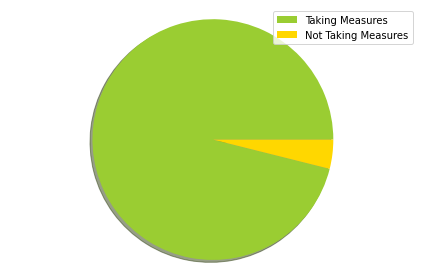

In [80]:
labels = ['Taking Measures', 'Not Taking Measures']
sizes = [taking_measures, not_taking_measures]
colors = ['yellowgreen', 'gold']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Now let's do it again but by country

In [136]:
# countries_surveyed = africa_df['Country'].unique()
countries_surveyed_df = lambda q: sqldf(q, globals())
query = """
SELECT
    country, count(*) as NOT_TAKING_PREVENTATIVE_STEPS
FROM
    africa_df p
WHERE
    p.VirusPrevention LIKE '%no%'
GROUP BY
    Country
ORDER BY
    NOT_TAKING_PREVENTATIVE_STEPS DESC

"""
df_temp = countries_surveyed_df(query)
# not_taking_measures = df_temp.iloc[0][0]
print(df_temp)

                            Country  NOT_TAKING_PREVENTATIVE_STEPS
0       Ivory Coast (Cote D'Ivoire)                             27
1                        Mozambique                             23
2  Democratic Republic of the Congo                             21
3                             Benin                             18
4                            Zambia                             17
5                             Kenya                             14
6                             Ghana                             13
7                           Nigeria                              9
8                            Rwanda                              9
9                      South Africa                              5


In [128]:
# countries_surveyed = africa_df['Country'].unique()
# print(countries_surveyed)
# conn = sqlite3.connect('local.db')

# for country in range(len(countries_surveyed)):
#   countries_surveyed_raw_df = pd.DataFrame([countries_surveyed[country]])
#   print(countries_surveyed_raw_df)
#   countries_surveyed_df = lambda q: sqldf(q, globals())
#   query = """SELECT  count(*) as count from africa_df a, countries_surveyed_raw_df c  where a.country = country
#           and a.virusPrevention like '%yes%'"""
#   temp_df = pd.read_sql_query(query, params=[country], con = conn)
#   # temp_df = countries_surveyed_df(query)
#   print(temp_df)

['Kenya' 'Nigeria' 'Ghana' 'Zambia' 'Benin' 'South Africa' 'Mozambique'
 "Ivory Coast (Cote D'Ivoire)" 'Rwanda' 'Democratic Republic of the Congo']
       0
0  Kenya


DatabaseError: ignored

## The Respondents all listed their biggest challenges
Some of these challenges are the same thing expressed in different ways. I will combine them

In [44]:
challenge_array = africa_df['BiggestChallenge'].unique()
challenge_counts = africa_df['BiggestChallenge'].value_counts()
print(challenge_counts)
challenge_counts_df = pd.DataFrame(challenge_counts)
challenge_counts_df.rename( columns={list(challenge_counts_df)[0]:'Desc', 'BiggestChallenge':'Count'}, inplace=True )
challenge_counts_df.head()
print(challenge_counts_df.columns)

Money                                                       67
Corona virus                                                58
Coronavirus                                                 36
Food                                                        34
Covid 19                                                    27
                                                            ..
Staying indoor without income                                1
My biggest challenge today is that I have no food to eat     1
Luck of proper transport to town                             1
Staying at home without any financial support                1
It is the issue of Corronavirus                              1
Name: BiggestChallenge, Length: 1388, dtype: int64
Index(['Count'], dtype='object')


In [46]:
challenge_counts_df.head()

,Count
count,1388.000000
mean,1.440922
std,3.205546
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,67.000000


In [26]:
challenge_counts_df = pd.DataFrame(challenge_counts)
challenge_counts_df_q = lambda q: sqldf(q, globals())
query = """
SELECT 
    sum(*)
FROM
    challenge_counts_df c
WHERE
    c.BiggestChallenge LIKE '%covid%, %coronavirus%, %corona%, %virus%'
LIMIT 10;
"""
df_temp = challenge_counts_df_q(query)
df_temp.head()

PandaSQLException: ignored